<a href="https://colab.research.google.com/github/kplr-training/Machine-Learning/blob/main/FR/Supervised/classification/04_Decision_Trees_Cancer_Solution.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> **Arbres de décision** </center>

Ils sont utilisés pour l'apprentissage supervisé pour les tâches de classification et de régression.

* https://scikit-learn.org/stable/modules/tree.html
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Install Graphviz module
```
sudo pip3 install graphviz
sudo yum install graphviz
```

In [2]:
import sys
!{sys.executable} -m pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 19.7 MB/s eta 0:00:00


Feature importances: [0. 1.]


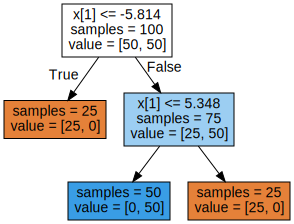

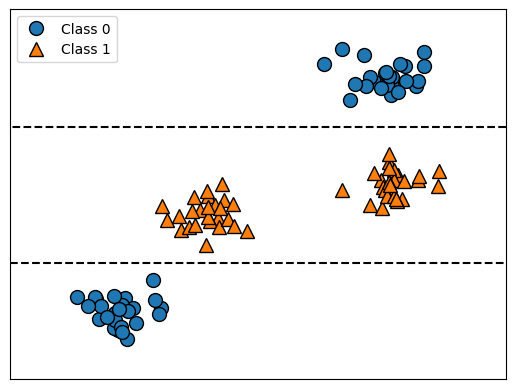

In [3]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

mglearn.plots.plot_tree_not_monotone()

1. Diviser les données.
2. Instanciez le classificateur d'arbre de décision avec les paramètres par défaut.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [5]:
print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.937


**Avertissement :**
Une précision de 1,00 signifie que toutes les feuilles sont pures. La ramification de l'arbre est donc descendue jusqu'à ce que l'algorithme puisse mémoriser et ajuster toutes les étiquettes.
jusqu'à ce que l'algorithme puisse mémoriser et ajuster toutes les étiquettes.
Il s'agit d'un overfitting. Cela se produit parce que l'arbre de décision n'était pas limité
et est descendu jusqu'à ce qu'il s'adapte parfaitement aux données d'apprentissage.

Pour éviter l'Overfitting, nous appliquons des restrictions pour limiter la profondeur de l'arbre de décision, ce qui à son tour va limiter sa complexité.

Technique d'élagage :

Il existe deux types d'élagage, pré et post.
- Avec l'élagage précoce, nous arrêtons la création de l'arbre à un stade plus précoce. Ainsi, nous pouvons limiter :
1. la profondeur de l'arbre,
2. le nombre maximal de feuilles,
3. spécifier un minimum de points pour un nœud afin de pouvoir effectuer de nouvelles divisions.
En limitant la profondeur de l'arbre, nous limitons le nombre de questions pouvant être posées.

- Avec l'élagage postérieur, une fois l'arbre créé, nous pouvons supprimer les branches ou nœuds non pertinents qui contiennent peu d'informations.

#### Essayons d'améliorer la précision avec du fine tuning :

In [6]:
tree_4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_4.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree_4.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree_4.score(X_test, y_test)))

# It increases the accuracy over the test data.

Accuracy on the training subset: 0.988
Accuracy on the test subset: 0.951


In [7]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='cancertree.dot', class_names=['malignant', 'benign'], feature_names=cancer.feature_names,
               impurity=False, filled=True)

### Transformer .dot à .png
```
dot -Tpng cancertree.dot -o cancertree.png
```
- Le rayon de la tumeur se trouve au sommet de l'arbre, ce qui nous amène à réfléchir à l'importance de cette caractéristique.

![](https://github.com/kplr-training/Machine-Learning/blob/main/01-SUPERVISED/02.CLASSIFICATION/cancertree.png?raw=1)

![](https://github.com/kplr-training/Machine-Learning/blob/main/01-SUPERVISED/02.CLASSIFICATION/cancertree_all.png?raw=1)

- Nous pouvons utiliser une propriété de l'arbre de décision appelée importance des caractéristiques "feature importances".
- Elle nous indique le poids de chaque caractéristique dans la prise de décision.
- Ainsi, chaque caractéristique
i attribue zéro et un.
- 0 signifie que la caractéristique n'est pas utilisée dans le processus de décision
tandis que 1 signifie qu'elle prédit parfaitement la cible 'target'.

In [8]:
print("Feature importances: {}".format(tree.feature_importances_))

Feature importances: [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


In [9]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### Une meilleure façon de procéder :
- Nous pouvons voir que la caractéristique la plus importante est le 'worst radius', qui se trouve, comme nous l'avons vu précédemment, au sommet de l'arbre.

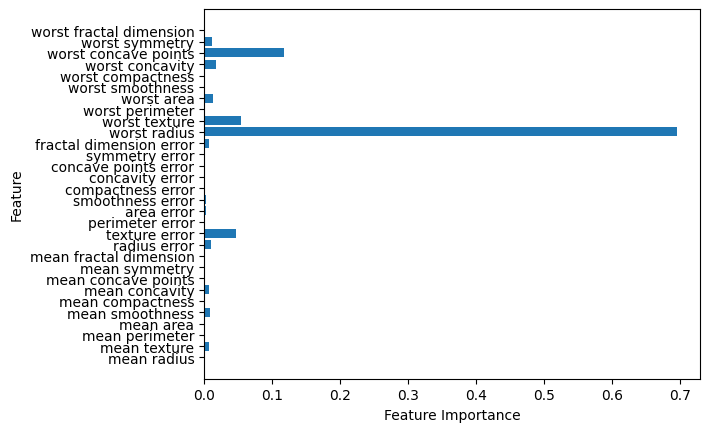

In [10]:
import numpy as np

n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### Avantages des arbres de décision

 - Facile à visualiser et à comprendre.
 - Contrairement à d'autres algorithmes de classification par apprentissage automatique, il n'est pas nécessaire de prétraiter, de normaliser, de mettre à l'échelle et/ou de standardiser les caractéristiques.

### Paramètres à utiliser

 - max_depth,
 - min_samples_leaf, max_samples_leaf,
 - max_leaf_nodes,
 - etc.

### Principaux inconvénients

- Tendance à l'overfitting, même si l'on crée un arbre d'élagage.
- Mauvaise généralisation.

##### => Contournement possible : de nombreux parittioners d'apprentissage automatique utilisent des ensembles d'arbres de décision.